In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings ('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


In [2]:
# train = pd.read_csv("/kaggle/input/playground-series-s4e3/train.csv")
# test = pd.read_csv("/kaggle/input/playground-series-s4e3/test.csv")


train = pd.read_csv('playground-series-s4e3/train.csv')
test = pd.read_csv("playground-series-s4e3/test.csv")

## Pre-Processing

In [3]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [5]:
print("Shape of Train dataset:-",train.shape)

Shape of Train dataset:- (19219, 35)


In [6]:
print("Shape of Test dataset:-",test.shape)

Shape of Test dataset:- (12814, 28)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12814 non-null  int64  
 1   X_Minimum              12814 non-null  int64  
 2   X_Maximum              12814 non-null  int64  
 3   Y_Minimum              12814 non-null  int64  
 4   Y_Maximum              12814 non-null  int64  
 5   Pixels_Areas           12814 non-null  int64  
 6   X_Perimeter            12814 non-null  int64  
 7   Y_Perimeter            12814 non-null  int64  
 8   Sum_of_Luminosity      12814 non-null  int64  
 9   Minimum_of_Luminosity  12814 non-null  int64  
 10  Maximum_of_Luminosity  12814 non-null  int64  
 11  Length_of_Conveyer     12814 non-null  int64  
 12  TypeOfSteel_A300       12814 non-null  int64  
 13  TypeOfSteel_A400       12814 non-null  int64  
 14  Steel_Plate_Thickness  12814 non-null  int64  
 15  Ed

In [9]:
train.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [10]:
test.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [11]:
train.duplicated().sum()

0

In [12]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

## Data Exploration


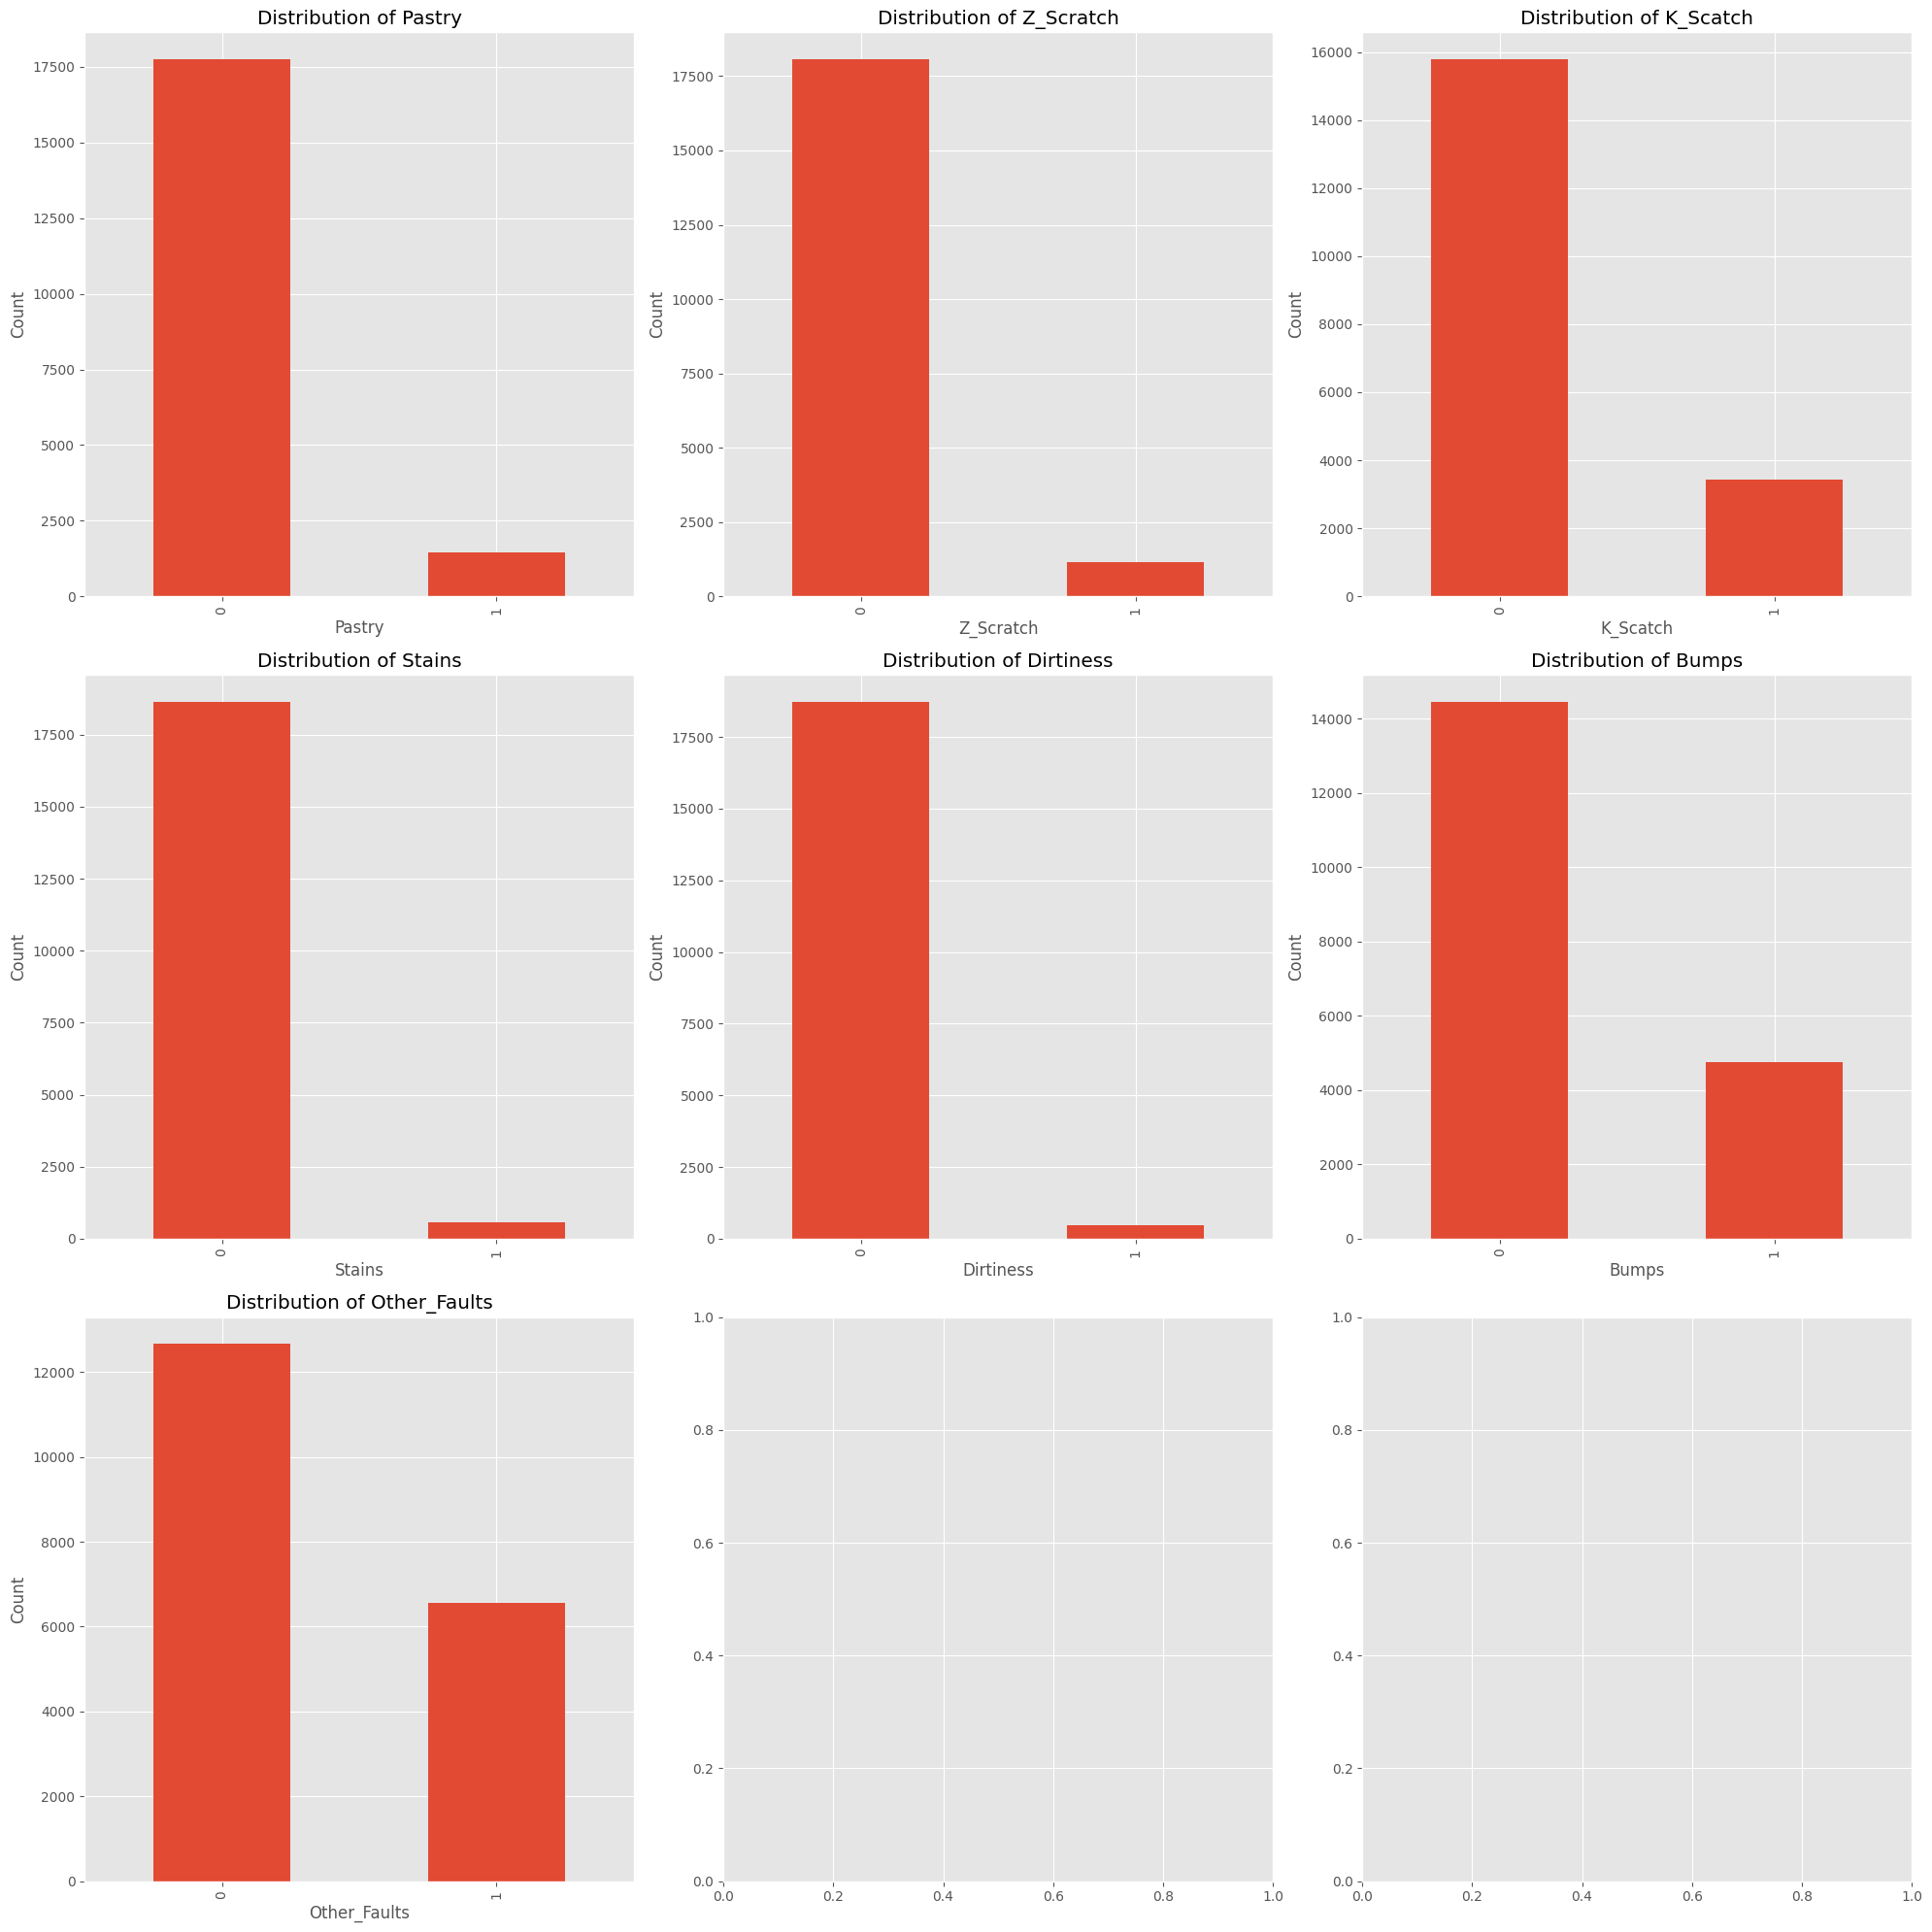

In [13]:
# target variable distribution
target_vars = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
n_cols = 3  # Number of columns for plots
n_rows = (len(target_vars) // n_cols) + 1  # Dynamic rows based on number of variables and columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Create subplots

for i, var in enumerate(target_vars):
    row, col = divmod(i, n_cols)  # Calculate row and column index
    train[var].value_counts().plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Count')
 
plt.tight_layout()
plt.show()

In [14]:
train_df = train.copy()

In [15]:
#creating a 'Fault_type column for EDA purpose '
train_df['Fault_Type'] = train_df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].idxmax(axis=1)

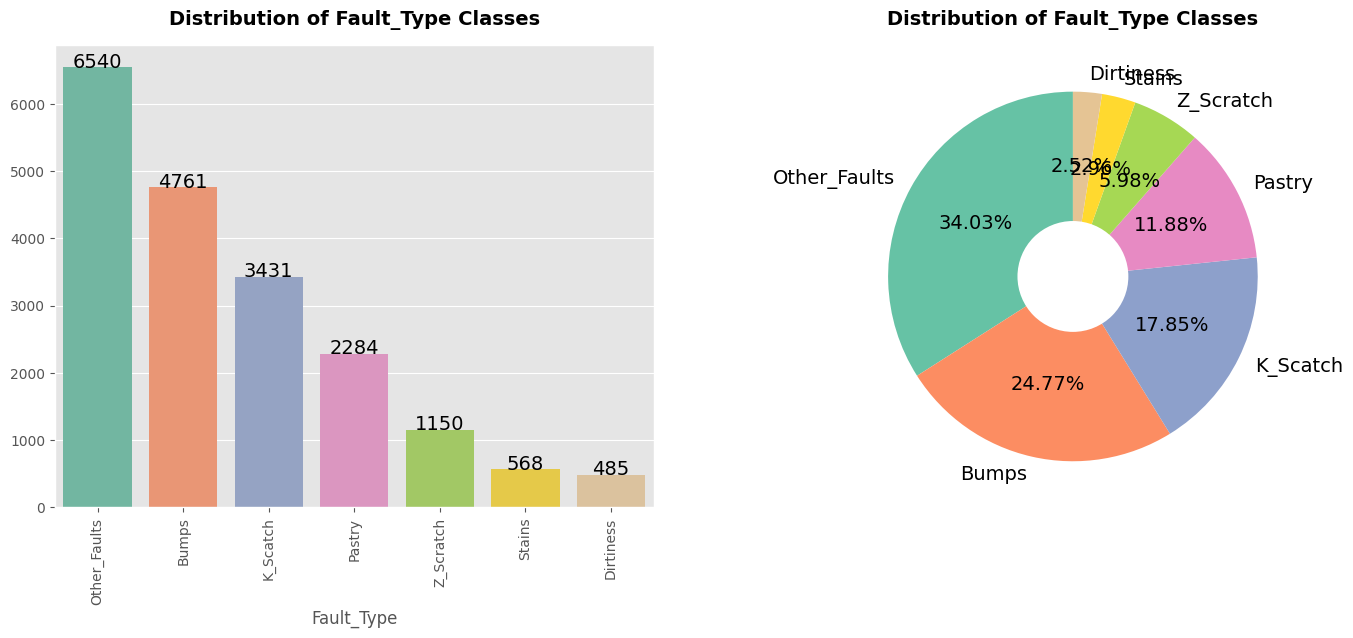

In [16]:
# Visualization to show distribution of Fault_Type classes
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
Fault_Type_counts = train_df["Fault_Type"].value_counts()
sns.barplot(x=Fault_Type_counts.index, y=Fault_Type_counts.values, palette='Set2')
plt.title("Distribution of Fault_Type Classes", fontweight="black", size=14, pad=15)
for i, v in enumerate(Fault_Type_counts.values):
    plt.text(i, v, v, ha="center", fontsize=14)
plt.xticks(rotation=90)
# Visualization to show distribution of Fault_Type classes in percentage
plt.subplot(1, 2, 2)
colors = sns.color_palette('Set2', len(Fault_Type_counts))
plt.pie(Fault_Type_counts, labels=Fault_Type_counts.index, autopct="%.2f%%", textprops={"size": 14},
        colors=colors, startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Distribution of Fault_Type Classes", fontweight="black", size=14, pad=15)
plt.show()

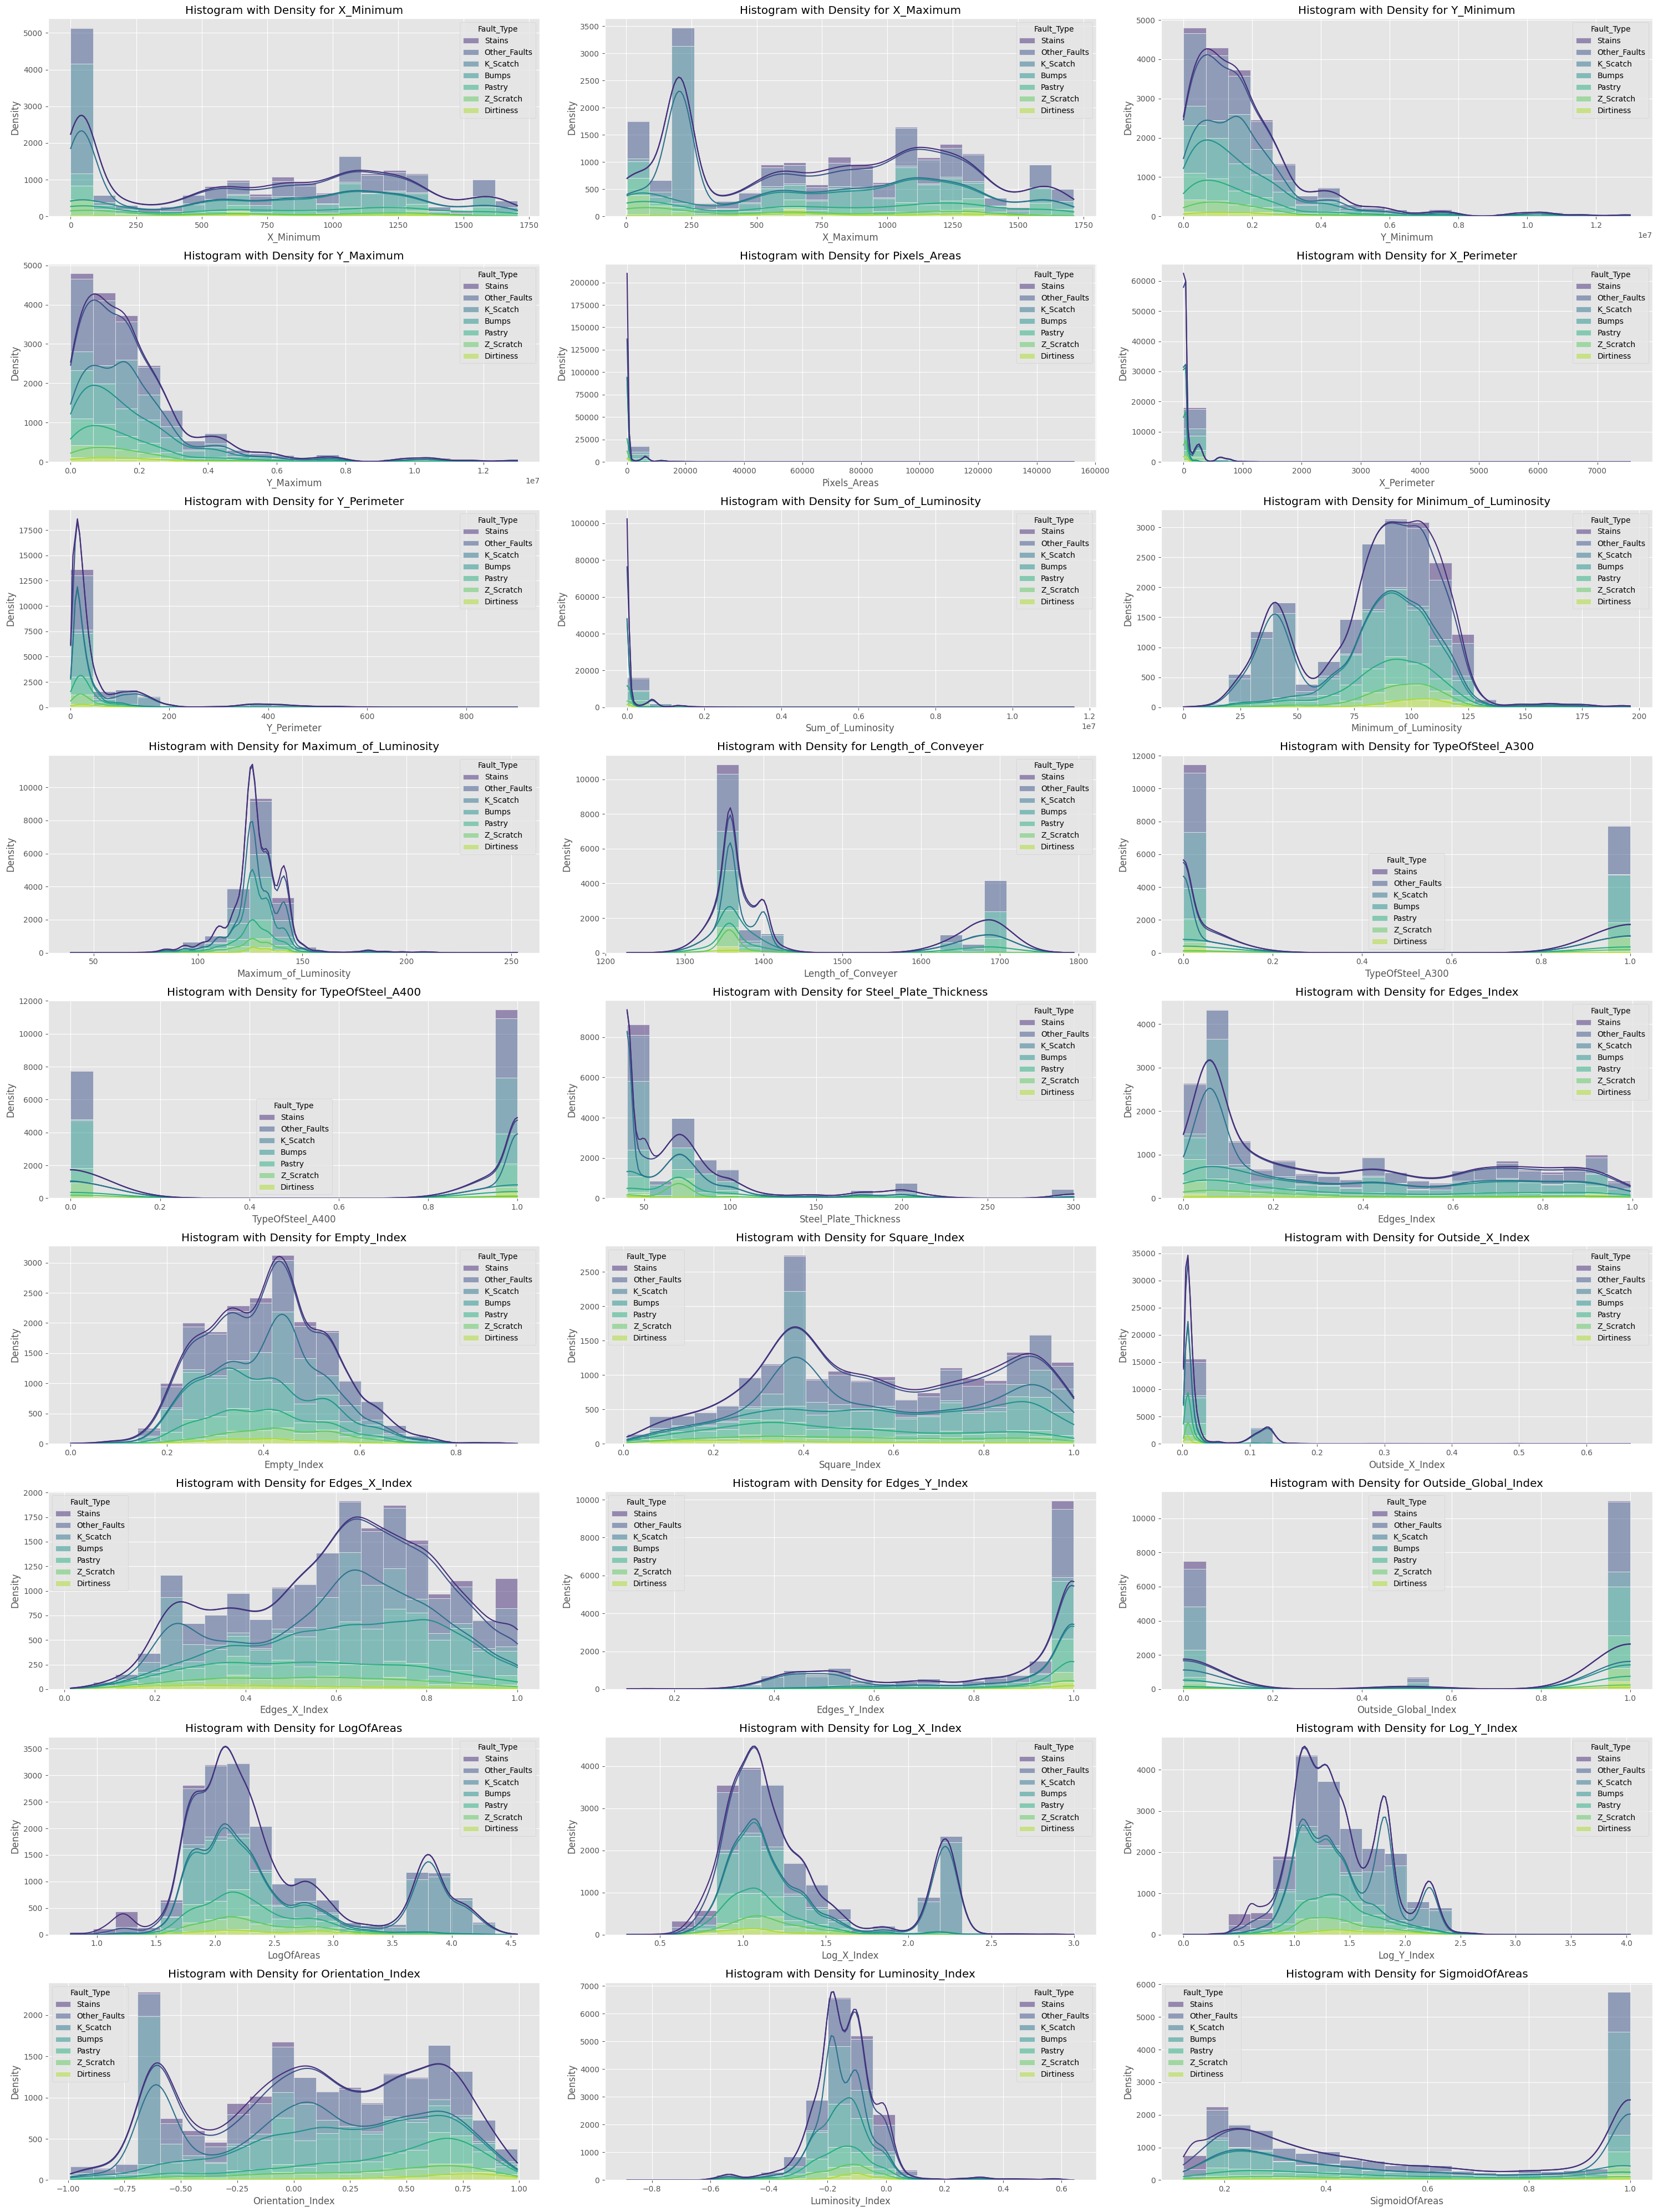

In [17]:
numerical_features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
                      'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity',
                      'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
                      'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index',
                      'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
                      'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
                      'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']

# Set the figure size and arrange plots horizontally in pairs
fig, axes = plt.subplots(nrows=(len(numerical_features) + 2) // 3, ncols=3, figsize=(30, 40))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_df, x=col, hue='Fault_Type', multiple="stack", bins=20, kde=True, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Remove any empty subplots if the number of columns is odd
if len(numerical_features) % 3 != 0:
    for j in range(len(numerical_features) % 3, 3):
        fig.delaxes(axes[-j - 1])

plt.tight_layout()
plt.show()

# From these plots we can make the following conclusions about the features' distributions:

- Normal: Maximum_of_Luminosity, Empty_Index, Square_Index, and Luminosity_Index
- Close to normal: Minimum_of_Luminosity, and Orientation_Index
- Skewed to the right: Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, and Sum_of_Luminosity
- Close to skewed to the right: Log_Y_Index
- Close to skewed to the left: Edges_X_Index
- Close to uniform: X_Minimum, X_Maximum, EdgesIndex, Edges_Y_Index, and SigmoidOfAreas

**The features not mentioned have distributions that we are unable to categorise.**


In [18]:
corr = train.corr()

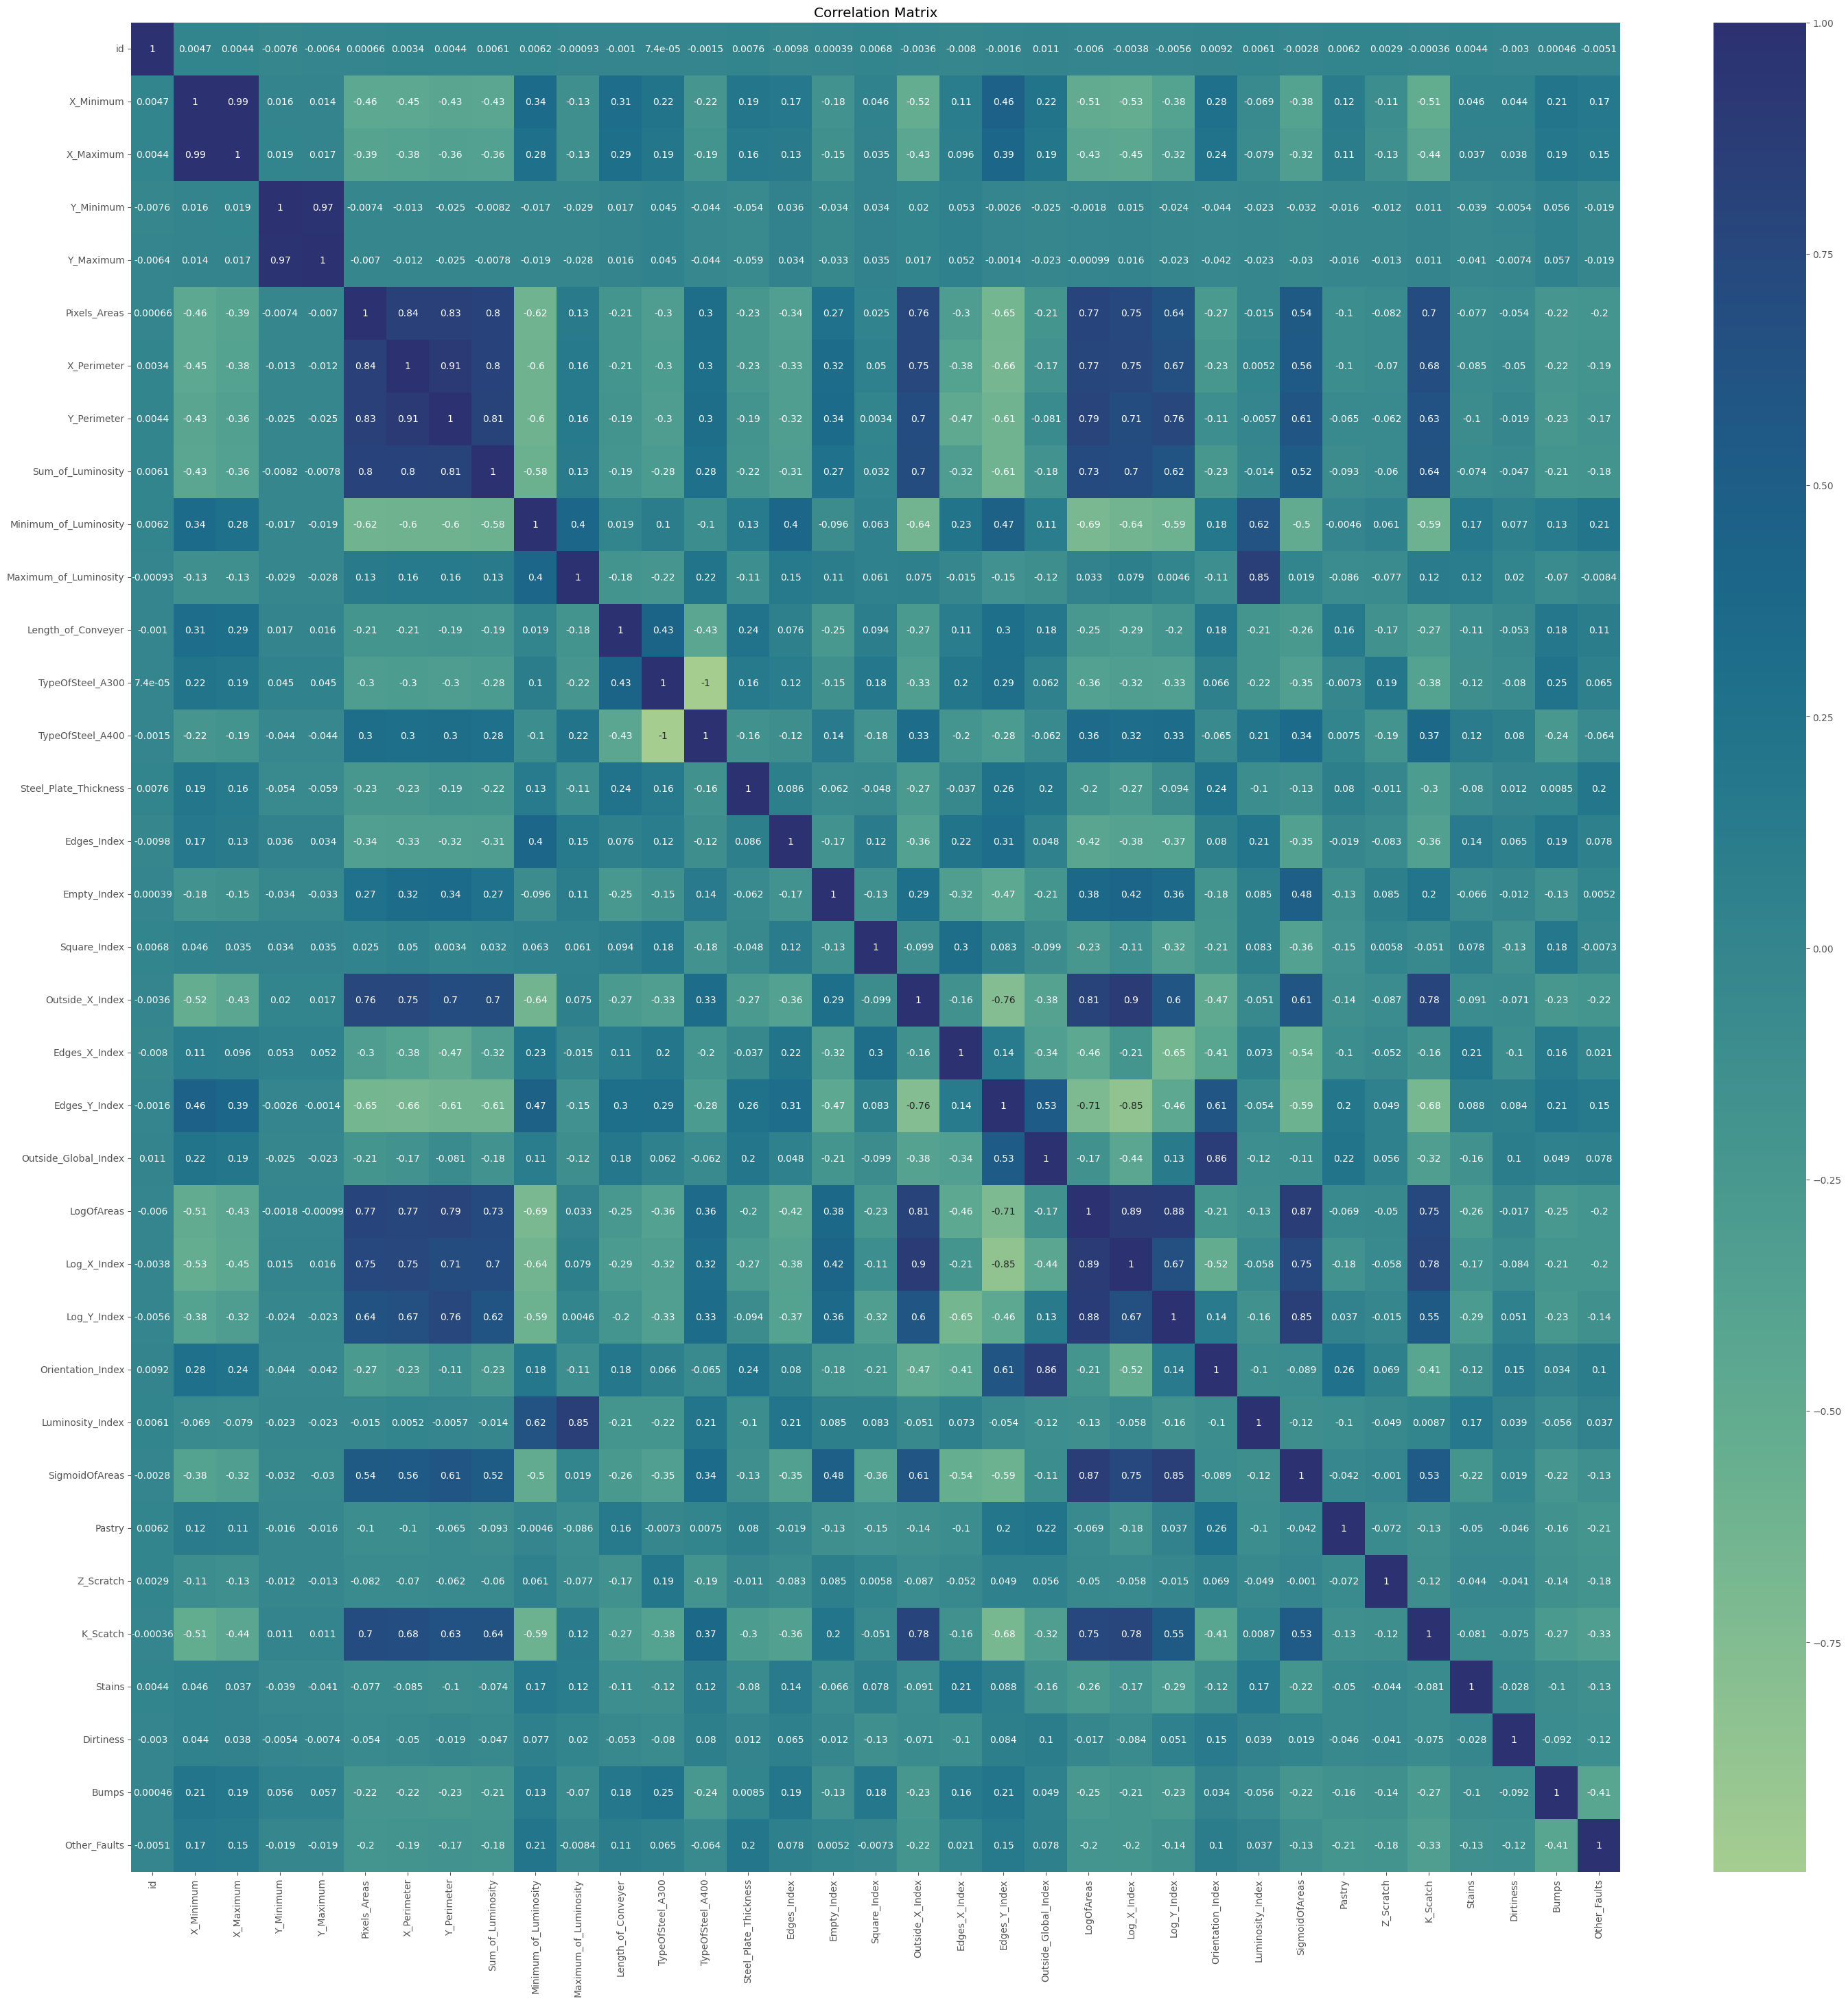

In [19]:
# Create a new figure for the heatmap with a specific size
plt.figure(figsize=(35, 35))

# Create heatmap
sns.heatmap(corr, annot=True, cmap='crest')
plt.title("Correlation Matrix")
plt.show()

## XGBoost Model + Hyper-Tuned

In [20]:
# Preprocess the data
X = train.drop(['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1)
y = train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]


In [21]:

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:

# Split the dataset into training and validation sets
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize model
model = MultiOutputClassifier(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))


In [23]:

# Define parameter grid
param_grid2 = {
    'estimator__max_depth': [3, 4, 5, 6, 8],
    'estimator__learning_rate': [0.005, 0.01, 0.1, 0.2],
    'estimator__n_estimators': [100, 200, 500],
    'estimator__min_child_weight': [1, 3, 5],
    'estimator__gamma': [0, 0.01, 0.1, 1],
    'estimator__colsample_bytree': [0.5, 0.7, 1]
}


In [24]:

# Randomized search with cross-validation
grid_search2 = RandomizedSearchCV(model, param_grid2, scoring='roc_auc', cv=5, verbose=1, n_iter=70, random_state=42)
grid_search2.fit(X_train_scaled, y_train)

# Print best params
print("Best parameters found: ", grid_search2.best_params_)


Fitting 5 folds for each of 70 candidates, totalling 350 fits


Best parameters found:  {'estimator__n_estimators': 500, 'estimator__min_child_weight': 5, 'estimator__max_depth': 5, 'estimator__learning_rate': 0.01, 'estimator__gamma': 0.01, 'estimator__colsample_bytree': 0.5}


In [25]:
best_model = grid_search2.best_estimator_

# Predict on validation
predictions_val = best_model.predict_proba(X_val_scaled)


In [26]:

# Predictions on test
X_test_scaled = scaler.transform(test.drop(['id'], axis=1))
predictions_test = best_model.predict_proba(X_test_scaled)


In [27]:

# Create submission file
probs = pd.DataFrame({class_: predictions_test[i][:, 1] for i, class_ in enumerate(y.columns)})
submission = test [['id']].join(probs)
submission.to_csv('XGB_submission_2.csv', index=False)
print("Submission file saved.")

Submission file saved.
